In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:


df = pd.read_excel(r"C:\Users\akash\Downloads\Online Retail.xlsx")
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.shape
df.columns
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[us]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  str           
dtypes: datetime64[us](1), float64(2), int64(1), object(3), str(1)
memory usage: 40.0+ MB


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df = df.dropna(subset=['CustomerID'])

In [11]:
df = df[df['Quantity'] > 0]

In [13]:
df.reset_index(drop=True, inplace=True)

In [15]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [17]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [19]:
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year

In [21]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,Month,Year
count,397924.000000,397924,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,2011-07-10 23:43:36.912476,3.116174,15294.315171,22.394749,7.612537,2010.934259
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000,0.000000,1.000000,2010.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000,5.000000,2011.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000,8.000000,2011.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000,11.000000,2011.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000,12.000000,2011.000000
std,180.420210,NaN,22.096788,1713.169877,309.055588,3.416527,0.247829


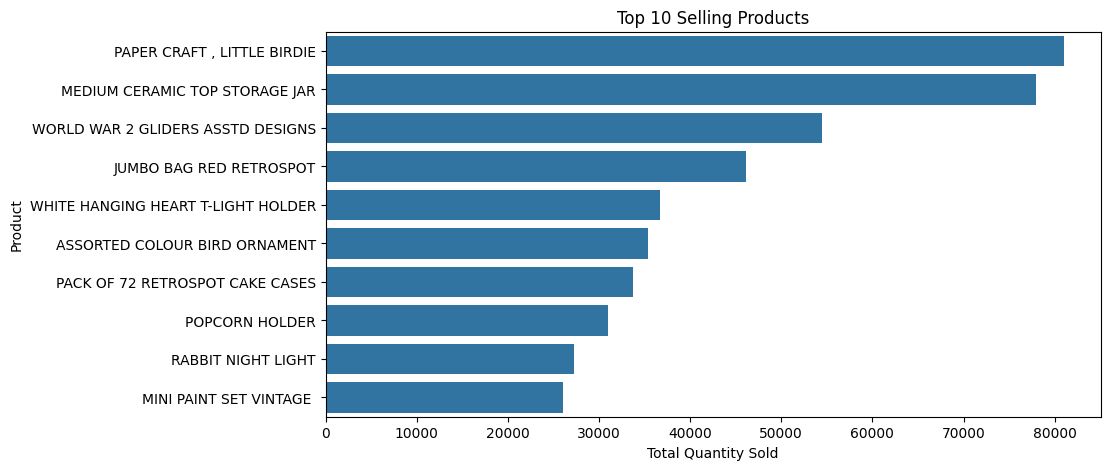

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

top_products = (
    df.groupby('Description')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product")
plt.show()


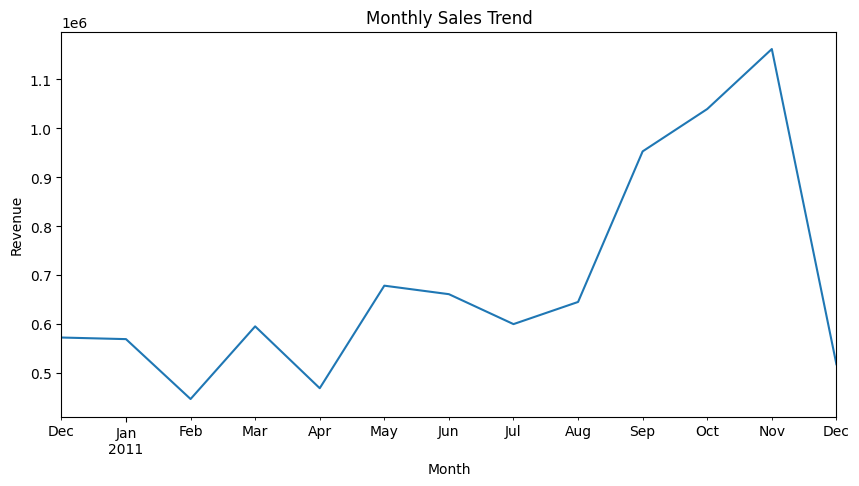

In [27]:
monthly_sales = df.resample('ME', on='InvoiceDate')['TotalPrice'].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.show()


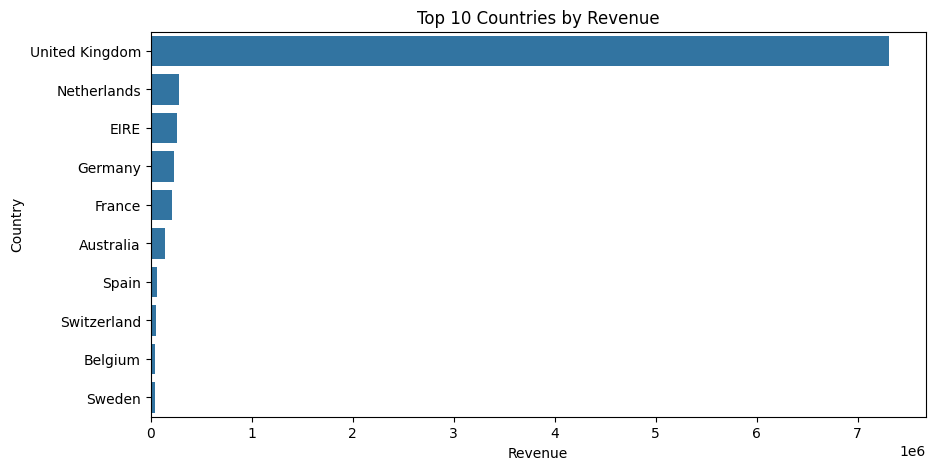

In [29]:
country_sales = (
    df.groupby('Country')['TotalPrice']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(x=country_sales.values, y=country_sales.index)
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Country")
plt.show()


In [31]:
customer_spending = (
    df.groupby('CustomerID')['TotalPrice']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

customer_spending


CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: TotalPrice, dtype: float64

In [33]:
product_revenue = (
    df.groupby('Description')['TotalPrice']
    .sum()
    .sort_values(ascending=False)
)

product_revenue.head(10)


Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: TotalPrice, dtype: float64

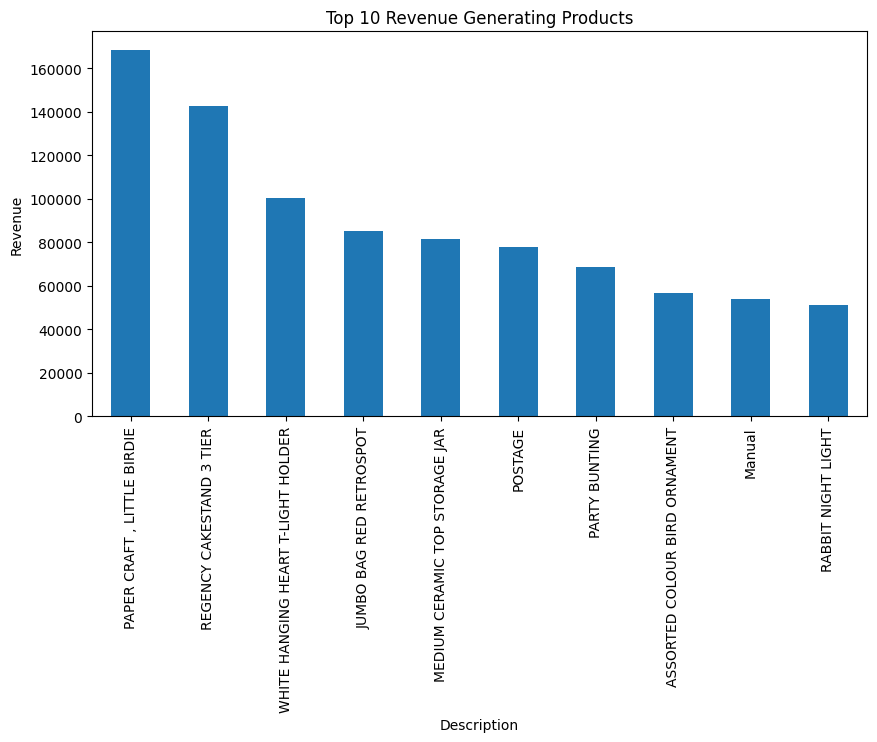

In [35]:
top_revenue_products = product_revenue.head(10)

plt.figure(figsize=(10,5))
top_revenue_products.plot(kind='bar')
plt.title("Top 10 Revenue Generating Products")
plt.ylabel("Revenue")
plt.show()


In [37]:
country_analysis = df.groupby('Country').agg(
    Total_Revenue=('TotalPrice', 'sum'),
    Total_Orders=('InvoiceNo', 'nunique')
).sort_values(by='Total_Revenue', ascending=False)

country_analysis.head(10)


,Total_Revenue,Total_Orders
Country,,
United Kingdom,7308391.554,16649
Netherlands,285446.340,95
EIRE,265545.900,260
Germany,228867.140,457
France,209024.050,389
Australia,138521.310,57
Spain,61577.110,90
Switzerland,56443.950,51
Belgium,41196.340,98


In [39]:
average_order_value = (
    df.groupby('InvoiceNo')['TotalPrice']
    .sum()
    .mean()
)

average_order_value


np.float64(480.7621873111782)

In [41]:
monthly_sales = df.resample('ME', on='InvoiceDate')['TotalPrice'].sum()

monthly_growth = monthly_sales.pct_change() * 100
monthly_growth


InvoiceDate
2010-12-31          NaN
2011-01-31    -0.570765
2011-02-28   -21.478401
2011-03-31    33.180724
2011-04-30   -21.209108
2011-05-31    44.627885
2011-06-30    -2.561304
2011-07-31    -9.244013
2011-08-31     7.541004
2011-09-30    47.648158
2011-10-31     9.076084
2011-11-30    11.786431
2011-12-31   -55.398086
Freq: ME, Name: TotalPrice, dtype: float64

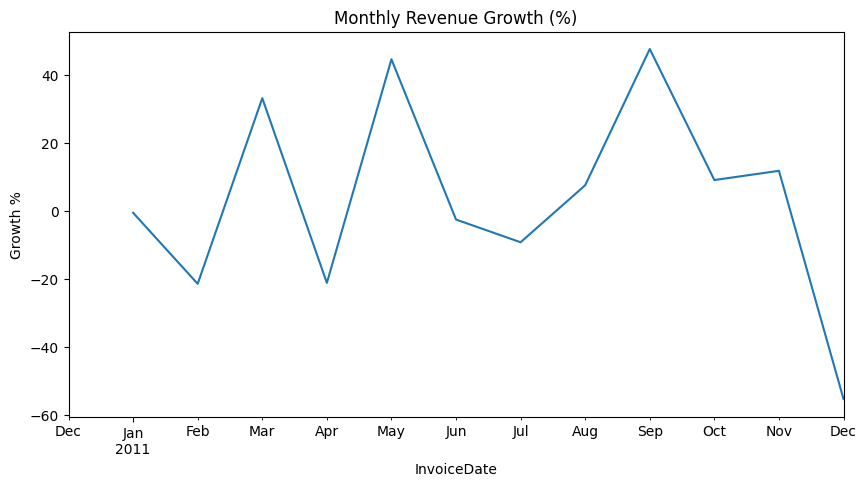

In [43]:
monthly_growth.plot(figsize=(10,5))
plt.title("Monthly Revenue Growth (%)")
plt.ylabel("Growth %")
plt.show()


In [45]:
customer_orders = df.groupby('CustomerID')['InvoiceNo'].nunique()

repeat_customers = customer_orders[customer_orders > 1].count()
one_time_customers = customer_orders[customer_orders == 1].count()

repeat_customers, one_time_customers


(np.int64(2845), np.int64(1494))

In [47]:
basket_size = df.groupby('InvoiceNo')['Quantity'].sum()

basket_size.describe()


count    18536.000000
mean       279.547691
std        976.796524
min          1.000000
25%         74.000000
50%        155.000000
75%        291.000000
max      80995.000000
Name: Quantity, dtype: float64

In [57]:
df['Hour'] = df['InvoiceDate'].dt.hour
df['Day'] = df['InvoiceDate'].dt.day_name()

df.groupby('Day')['TotalPrice'].sum().sort_values(ascending=False)


Day
Thursday     1976859.070
Tuesday      1700634.631
Wednesday    1588336.170
Friday       1485917.401
Monday       1367146.411
Sunday        792514.221
Name: TotalPrice, dtype: float64

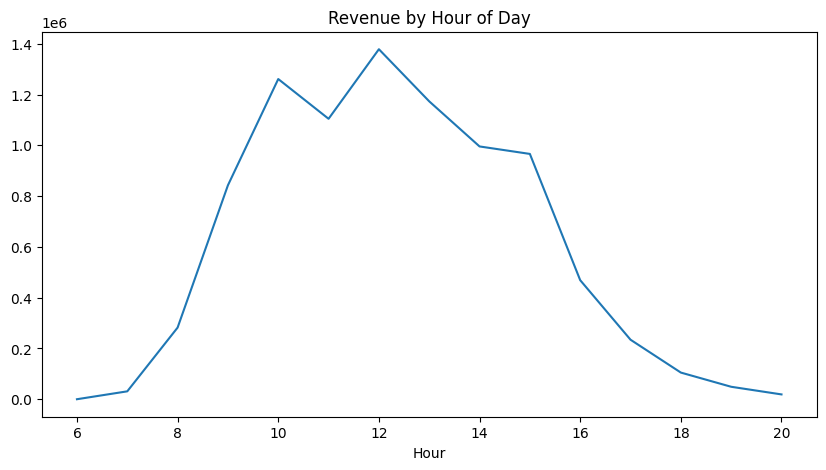

In [59]:
df.groupby('Hour')['TotalPrice'].sum().plot(figsize=(10,5))
plt.title("Revenue by Hour of Day")
plt.show()
